Analysing the data gathered with my WebScrapper
===============================================

For this notebook, I followed GitHub public examples for the organization and formatting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

Loading our csv file in a pandas data frame.

In [2]:
plt.close("all")
catalogFilePath = os.path.join("..","data", "catalog.csv")
df = pd.read_csv(catalogFilePath)

#### Metrics and Analysis


  #### -- Average price:
  
  #####    Rent, condo fee and total per neigborhood

,rent,condo_fee,total_monthly_value
neighborhood,,,
Aeroporto,1920.0,195.3,2115.3
Areia Branca,1200.0,0.0,1200.0
Aruana,1614.5,359.1,1973.6
Atalaia,3521.7,660.7,4182.4
Capucho,850.0,150.0,1000.0
Centro,700.0,0.0,700.0
Cidade Nova,750.0,0.0,750.0
Cirurgia,1025.0,563.0,1588.0
Coroa do Meio,2354.8,534.2,2889.0


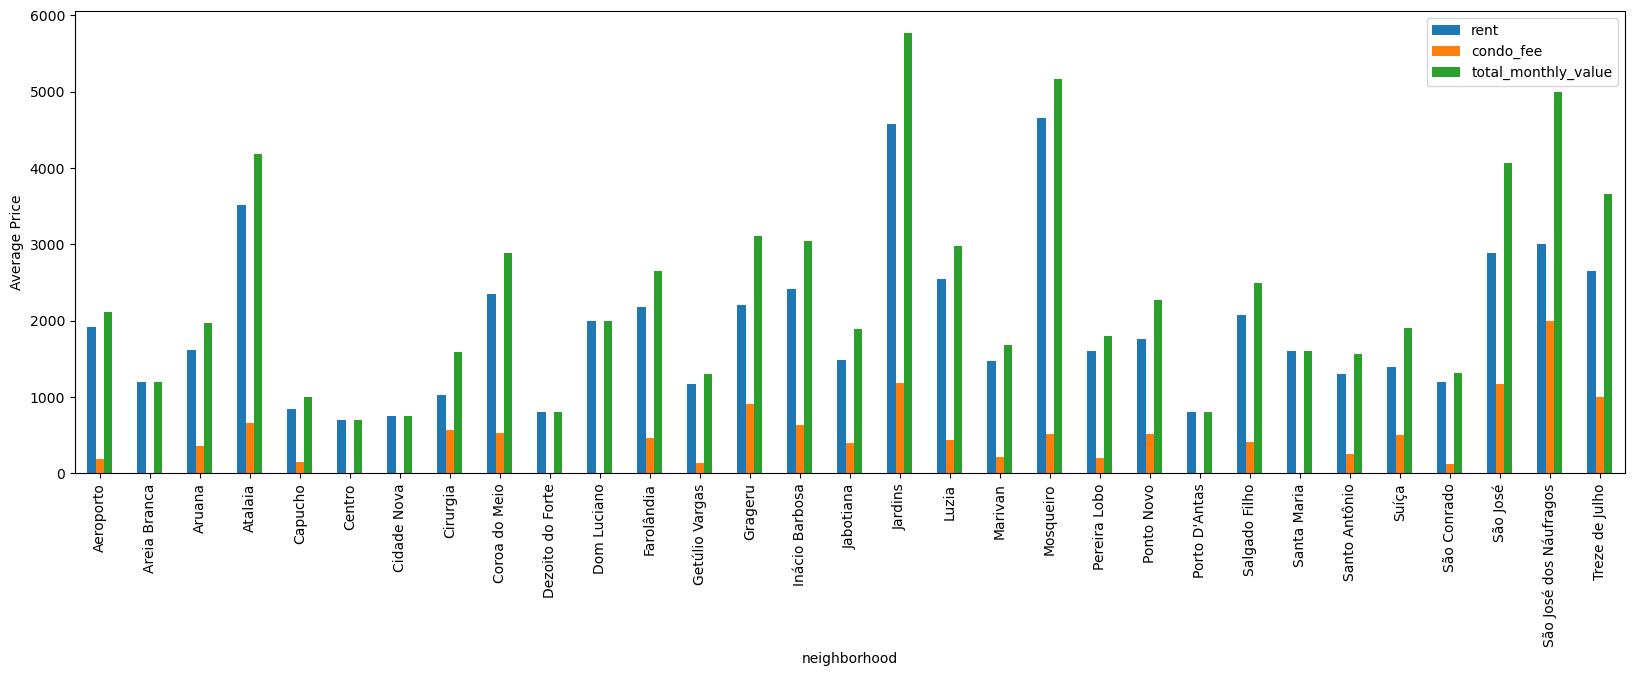

In [3]:
colsToSum = ["rent", "condo_fee", "total_monthly_value"]
nhAvgPricesResults = df.groupby("neighborhood")[colsToSum].mean()
display(nhAvgPricesResults.round(1))

nhAvgPricesResults.round(1).plot(kind="bar", figsize=(20,6))
plt.ylabel("Average Price")
plt.show()


 #####    Price per m² per neigborhood

,pricePerM²
neighborhood,
Aeroporto,35.0
Areia Branca,20.0
Aruana,38.0
Atalaia,49.0
Capucho,25.0
Centro,18.0
Cidade Nova,15.0
Cirurgia,18.0
Coroa do Meio,42.0


34.0

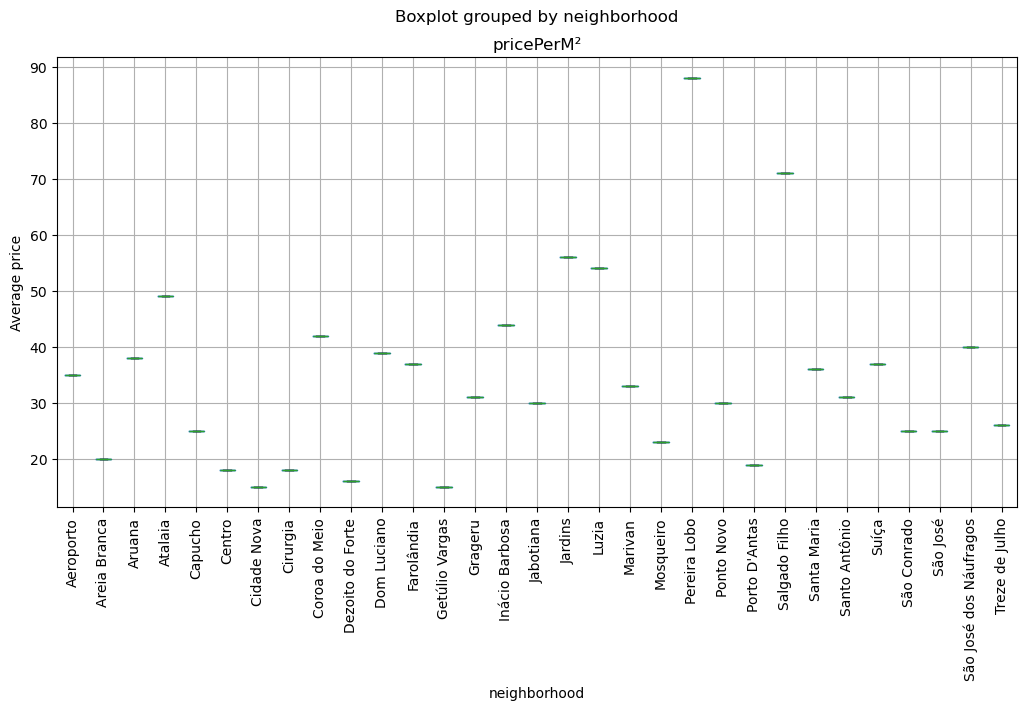

In [4]:
df["pricePerM²"] = df["total_monthly_value"]/df["property_size"]
colsToSum = ["pricePerM²"]
nhresultsPricepPerM2= df.groupby("neighborhood")[colsToSum].mean()
display(nhresultsPricepPerM2.round(decimals=0))
meanM2 = nhresultsPricepPerM2.mean().round(0).item()
display(meanM2)

nhresultsPricepPerM2.round(0).boxplot(column="pricePerM²", by="neighborhood", figsize=(12,6))
plt.xticks(rotation=90)
plt.ylabel("Average price")
plt.show()

  #### -- Size distribuition comparison per neighborhood

In [5]:
colsToSum = ["property_size",  "bedrooms", "bathrooms", "parking_spaces"]
nhresultsSize = df.groupby("neighborhood")[colsToSum].mean()
display(nhresultsSize.round(decimals=0))

,property_size,bedrooms,bathrooms,parking_spaces
neighborhood,,,,
Aeroporto,62.0,2.0,1.0,0.0
Areia Branca,60.0,2.0,2.0,1.0
Aruana,58.0,2.0,1.0,1.0
Atalaia,85.0,2.0,2.0,2.0
Capucho,40.0,2.0,1.0,1.0
Centro,40.0,1.0,1.0,0.0
Cidade Nova,50.0,2.0,1.0,0.0
Cirurgia,96.0,2.0,1.0,0.0
Coroa do Meio,70.0,2.0,2.0,1.0


 ##### How the number of [bedrooms, bathrooms, parking_spaces] affects the rental price

 The comparison uses the average quantity of rentals with that especific combination of [bedrooms, bathrooms, parking_spaces] in other to be more precise about how consistent are the values(The larger the DataFrame, the more precise the values), also, just to be more pratical about the 

Below are two implementations I encountered: the first one before i research on possible approaches to implement the comparison, and the second one after.



In [6]:
combinations = {
    "bedrooms": [],
    "bathrooms": [],
    "parking_spaces": [],
    "total_monthly_value": [],
    "count": []
}
for i in range(5):
    for j in range(5):
        for k in range(5):
            cc = (
                df[(df["bedrooms"] == i) & 
                (df["bathrooms"] == j) & 
                (df["parking_spaces"] == k)]
            )
            count = len(cc)
            if not cc.empty:       
                newcc = cc["total_monthly_value"].mean().round(1).item()
                combinations["bedrooms"].append(i)
                combinations["bathrooms"].append(j)
                combinations["parking_spaces"].append(k)
                combinations["total_monthly_value"].append(newcc)
                combinations["count"].append(count)

sizeCompDataFrame = pd.DataFrame(data=combinations)
averageCount = sizeCompDataFrame["count"].mean().round(0).item()
filteredSizeCompDataFrame = sizeCompDataFrame[sizeCompDataFrame["count"] >= 10 ]
display(filteredSizeCompDataFrame.drop('count', axis=1))



,bedrooms,bathrooms,parking_spaces,total_monthly_value
3,2,1,0,1835.2
4,2,1,1,1971.7
7,2,2,1,2742.9
10,3,1,1,2427.9
11,3,1,2,5087.2
15,3,2,1,2496.0
16,3,2,2,3692.8


neighborhood,bedrooms,bathrooms,parking_spaces,mean_price
Aeroporto,1,1,0,1800.000000
Aeroporto,2,1,0,1833.333333
Aeroporto,2,1,1,1639.000000
Aeroporto,3,1,0,2385.000000
Aeroporto,3,1,2,3738.000000
Aeroporto,3,2,1,2145.500000
Areia Branca,2,2,1,1200.000000
Aruana,2,1,0,2202.666667
Aruana,2,1,1,1849.363636
Aruana,2,2,1,1739.666667


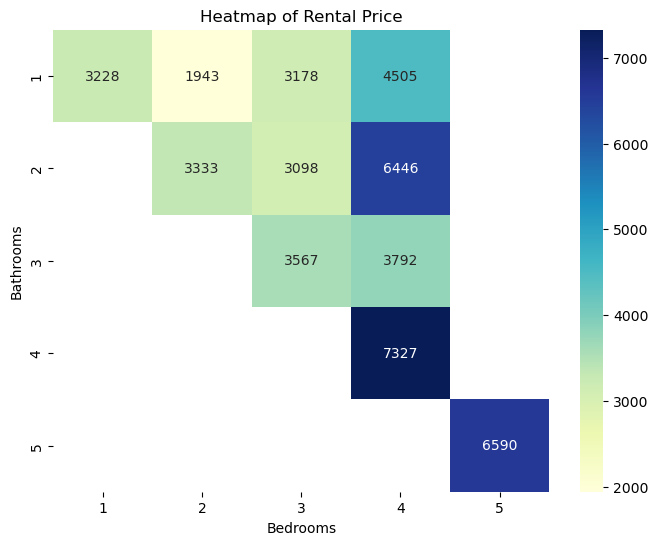

In [7]:
jj = df[
    (df['bedrooms'] <= 11) & 
    (df['bathrooms'] <= 11) & 
    (df['parking_spaces'] <= 11)
]
groupbyAvarege_prices = jj.groupby(["neighborhood","bedrooms", "bathrooms", "parking_spaces"])["total_monthly_value"].mean().reset_index(name="mean_price")
counts = df.groupby(["neighborhood","bedrooms", "bathrooms", "parking_spaces"]).size().reset_index(name="count")

combinations = counts.merge(groupbyAvarege_prices, on=["neighborhood","bedrooms", "bathrooms", "parking_spaces"]) #Merging the two lists, to get the total month value and the count of the number of rentals that satisfies one combination.

averageCount = combinations["count"].median() #The average count to have a better consistency of values after use .mean().
filteredCombinations = combinations[combinations["count"] >= averageCount]
display(filteredCombinations.drop('count', axis=1).style.hide(axis="index"))

groups = filteredCombinations.groupby(['bedrooms', 'bathrooms'])['mean_price'].mean().unstack()


## https://www.youtube.com/watch?v=0U9cs2V-Mqc&pp=ygUWaGVhdG1hcCBzZWFib3JuIHB5dGhvbg%3D%3D, tutorial that i used and had the inspiration to do a heatmap.
heatmap_data = filteredCombinations.pivot_table(index='bathrooms', columns='bedrooms', values='mean_price')

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Rental Price')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()